# Formula 1 Driver Analysis

## Table of Contents
- [Load Data](#Load-Data)
- [Data Cleaning](#Data-Cleaning)
- [Data Visualization and Analysis](#Data-Visualization-and-Analysis)

Imports

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization
%matplotlib inline
sns.set(color_codes=True)

## Load Data

In [204]:
path = "../data/"
df_drivers = pd.read_csv(path + "drivers.csv")
df_constructors = pd.read_csv(path + "constructors.csv")
df_races = pd.read_csv(path + "races.csv")
df_results = pd.read_csv(path + "results.csv")
df_laptimes = pd.read_csv(path + "lap_times.csv")
df_qualifying = pd.read_csv(path + "qualifying.csv")

#### Peek at data

In [205]:
df_drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [206]:
df_constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [207]:
df_races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [208]:
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [209]:
df_laptimes.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [210]:
df_qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


## Data Cleaning

#### Include only the years since Max Verstappen joined Redbull (2016 - Present)

Check size beforehand to ensure it worked

In [211]:
df_races.shape

(1125, 18)

In [212]:
df_drivers.shape

(859, 9)

In [213]:
df_constructors.shape

(212, 5)

In [214]:
df_results.shape

(26519, 18)

In [215]:
df_laptimes.shape

(575029, 6)

In [216]:
df_qualifying.shape

(10254, 9)

In [217]:
years = list(range(2016, 2025))
df_races = df_races[df_races['year'].isin(years)]
df_races.shape

(190, 18)

Now inlude only data that pertains to the races in the given time frame

In [218]:
df_results = df_results[df_results['raceId'].isin(df_races['raceId'])].reset_index(drop=True)
df_results.shape

(3601, 18)

In [219]:
df_drivers = df_drivers[df_drivers['driverId'].isin(df_results['driverId'])].reset_index(drop=True)
df_drivers.shape

(47, 9)

In [220]:
df_constructors = df_constructors[df_constructors['constructorId'].isin(df_results['constructorId'])].reset_index(drop=True)
df_constructors.shape

(17, 5)

In [221]:
df_laptimes = df_laptimes[df_laptimes['raceId'].isin(df_races['raceId'])].reset_index(drop=True)
df_laptimes.shape

(193216, 6)

In [222]:
df_qualifying = df_qualifying[df_qualifying['raceId'].isin(df_races['raceId'])].reset_index(drop=True)
df_qualifying.shape

(3591, 9)

#### Delete columns we won't be using

##### Races

In [223]:
df_races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
935,948,2016,1,1,Australian Grand Prix,2016-03-20,05:00:00,http://en.wikipedia.org/wiki/2016_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
936,949,2016,2,3,Bahrain Grand Prix,2016-04-03,15:00:00,http://en.wikipedia.org/wiki/2016_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
937,950,2016,3,17,Chinese Grand Prix,2016-04-17,06:00:00,http://en.wikipedia.org/wiki/2016_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
938,951,2016,4,71,Russian Grand Prix,2016-05-01,12:00:00,http://en.wikipedia.org/wiki/2016_Russian_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
939,952,2016,5,4,Spanish Grand Prix,2016-05-15,12:00:00,http://en.wikipedia.org/wiki/2016_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [224]:
df_races.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 935 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       190 non-null    int64 
 1   year         190 non-null    int64 
 2   round        190 non-null    int64 
 3   circuitId    190 non-null    int64 
 4   name         190 non-null    object
 5   date         190 non-null    object
 6   time         190 non-null    object
 7   url          190 non-null    object
 8   fp1_date     190 non-null    object
 9   fp1_time     190 non-null    object
 10  fp2_date     190 non-null    object
 11  fp2_time     190 non-null    object
 12  fp3_date     190 non-null    object
 13  fp3_time     190 non-null    object
 14  quali_date   190 non-null    object
 15  quali_time   190 non-null    object
 16  sprint_date  190 non-null    object
 17  sprint_time  190 non-null    object
dtypes: int64(4), object(14)
memory usage: 28.2+ KB


In [225]:
df_races = df_races.drop([
    'date', 'time', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
    'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time',
    'circuitId', 'url'
], axis=1)
df_races.head()

,raceId,year,round,name
935,948,2016,1,Australian Grand Prix
936,949,2016,2,Bahrain Grand Prix
937,950,2016,3,Chinese Grand Prix
938,951,2016,4,Russian Grand Prix
939,952,2016,5,Spanish Grand Prix


##### Lap Times

In [226]:
df_laptimes.head()

,raceId,driverId,lap,position,time,milliseconds
0,948,20,1,1,1:36.916,96916
1,948,20,2,1,1:31.664,91664
2,948,20,3,1,1:32.167,92167
3,948,20,4,1,1:32.014,92014
4,948,20,5,1,1:32.273,92273


In [227]:
df_laptimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193216 entries, 0 to 193215
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        193216 non-null  int64 
 1   driverId      193216 non-null  int64 
 2   lap           193216 non-null  int64 
 3   position      193216 non-null  int64 
 4   time          193216 non-null  object
 5   milliseconds  193216 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 8.8+ MB


##### Results

In [228]:
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,22917,948,3,131,6,2,1,1,1,25.0,57,1:48:15.565,6495565,21,3,1:30.557,210.815,1
1,22918,948,1,131,44,1,2,2,2,18.0,57,+8.060,6503625,48,4,1:30.646,210.608,1
2,22919,948,20,6,5,3,3,3,3,15.0,57,+9.643,6505208,23,2,1:29.951,212.235,1
3,22920,948,817,9,3,8,4,4,4,12.0,57,+24.330,6519895,49,1,1:28.997,214.510,1
4,22921,948,13,3,19,6,5,5,5,10.0,57,+58.979,6554544,39,9,1:32.288,206.861,1


In [229]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         3601 non-null   int64  
 1   raceId           3601 non-null   int64  
 2   driverId         3601 non-null   int64  
 3   constructorId    3601 non-null   int64  
 4   number           3601 non-null   object 
 5   grid             3601 non-null   int64  
 6   position         3601 non-null   object 
 7   positionText     3601 non-null   object 
 8   positionOrder    3601 non-null   int64  
 9   points           3601 non-null   float64
 10  laps             3601 non-null   int64  
 11  time             3601 non-null   object 
 12  milliseconds     3601 non-null   object 
 13  fastestLap       3601 non-null   object 
 14  rank             3601 non-null   object 
 15  fastestLapTime   3601 non-null   object 
 16  fastestLapSpeed  3601 non-null   object 
 17  statusId      

In [233]:
df_results = df_results.drop(
    ['resultId', 'number', 'fastestLap'],
    axis=1
)

In [236]:
df_results = df_results.rename(columns=
                       {'rank': 'fastestLapRank', 
                        'position': 'finalPosition', 
                        'positionText': 'finalPositionText'
                       })
df_results.head()

,raceId,driverId,constructorId,grid,finalPosition,finalPositionText,positionOrder,points,laps,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,statusId
0,948,3,131,2,1,1,1,25.0,57,1:48:15.565,6495565,3,1:30.557,210.815,1
1,948,1,131,1,2,2,2,18.0,57,+8.060,6503625,4,1:30.646,210.608,1
2,948,20,6,3,3,3,3,15.0,57,+9.643,6505208,2,1:29.951,212.235,1
3,948,817,9,8,4,4,4,12.0,57,+24.330,6519895,1,1:28.997,214.510,1
4,948,13,3,6,5,5,5,10.0,57,+58.979,6554544,9,1:32.288,206.861,1


##### Qualifying

In [230]:
df_qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,6683,948,1,131,44,1,1:25.351,1:24.605,1:23.837
1,6684,948,3,131,6,2,1:26.934,1:24.796,1:24.197
2,6685,948,20,6,5,3,1:26.945,1:25.257,1:24.675
3,6686,948,8,6,7,4,1:26.579,1:25.615,1:25.033
4,6687,948,830,5,33,5,1:26.934,1:25.615,1:25.434


In [231]:
df_qualifying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3591 entries, 0 to 3590
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      3591 non-null   int64 
 1   raceId         3591 non-null   int64 
 2   driverId       3591 non-null   int64 
 3   constructorId  3591 non-null   int64 
 4   number         3591 non-null   int64 
 5   position       3591 non-null   int64 
 6   q1             3591 non-null   object
 7   q2             3578 non-null   object
 8   q3             3564 non-null   object
dtypes: int64(6), object(3)
memory usage: 252.6+ KB


## Data Visualization and Analysis

#### Summary of Data

In [238]:
df_drivers.head(5)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
2,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
3,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
4,9,kubica,88,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica


In [239]:
df_constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
2,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
3,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
4,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari


In [240]:
df_races.head()

,raceId,year,round,name
935,948,2016,1,Australian Grand Prix
936,949,2016,2,Bahrain Grand Prix
937,950,2016,3,Chinese Grand Prix
938,951,2016,4,Russian Grand Prix
939,952,2016,5,Spanish Grand Prix


These three dataframes are for translating raceIds and driverIds into readable text, no analysis will be done on these

In [241]:
df_results.head()

,raceId,driverId,constructorId,grid,finalPosition,finalPositionText,positionOrder,points,laps,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,statusId
0,948,3,131,2,1,1,1,25.0,57,1:48:15.565,6495565,3,1:30.557,210.815,1
1,948,1,131,1,2,2,2,18.0,57,+8.060,6503625,4,1:30.646,210.608,1
2,948,20,6,3,3,3,3,15.0,57,+9.643,6505208,2,1:29.951,212.235,1
3,948,817,9,8,4,4,4,12.0,57,+24.330,6519895,1,1:28.997,214.510,1
4,948,13,3,6,5,5,5,10.0,57,+58.979,6554544,9,1:32.288,206.861,1


In [242]:
df_laptimes.head()

,raceId,driverId,lap,position,time,milliseconds
0,948,20,1,1,1:36.916,96916
1,948,20,2,1,1:31.664,91664
2,948,20,3,1,1:32.167,92167
3,948,20,4,1,1:32.014,92014
4,948,20,5,1,1:32.273,92273


In [243]:
df_qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,6683,948,1,131,44,1,1:25.351,1:24.605,1:23.837
1,6684,948,3,131,6,2,1:26.934,1:24.796,1:24.197
2,6685,948,20,6,5,3,1:26.945,1:25.257,1:24.675
3,6686,948,8,6,7,4,1:26.579,1:25.615,1:25.033
4,6687,948,830,5,33,5,1:26.934,1:25.615,1:25.434


These three dataframes are what we're really interested in. They include the qualifying times set by each driver before the race, the time to complete every single lap of every single race, and the final results of the race.

#### Driver Points Over Time

Text(0, 0.5, 'Points')

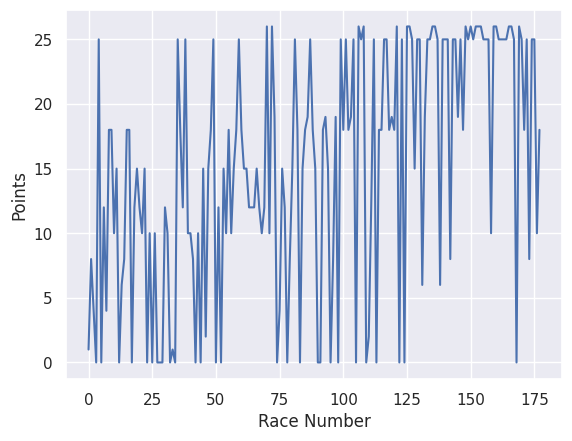

In [257]:
driver_id_max = df_drivers[df_drivers['code'] == 'VER'].iloc[0]['driverId']
max_results = df_results[df_results['driverId'] == driver_id_max].reset_index(drop=True)

fig, ax = plt.subplots()
ax.plot(max_results.index, max_results['points'])
ax.set_xlabel('Race Number')
ax.set_ylabel('Points')